# Grupo

ERIKA ALVES - RA 419113655  
JEAN SANTOS - RA 1419100688  
LUCAS DE PAULA - RA 2219104443  
MARCOS VINICIUS - RA 2219112101  
WALBER TAVARES - RA 2219104359  
YAN MORENO - RA 2219103461  

##### Entrega de Data Frame

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import statsmodels.api as sm
import re 

In [10]:
df2012 = pd.read_csv('/home/jean/Documents/Analise-de-Dados/Analise-de-Dados/df/reclamacoes-fundamentadas-sindec-2012.csv')
df2013 = pd.read_csv('/home/jean/Documents/Analise-de-Dados/Analise-de-Dados/df/reclamacoes-fundamentadas-sindec-2013.csv')
df2014 = pd.read_csv('/home/jean/Documents/Analise-de-Dados/Analise-de-Dados/df/reclamacoes-fundamentadas-sindec-2014.csv')
df2015 = pd.read_csv('/home/jean/Documents/Analise-de-Dados/Analise-de-Dados/df/reclamacoes-fundamentadas-sindec-2015.csv')
df2016 = pd.read_csv('/home/jean/Documents/Analise-de-Dados/Analise-de-Dados/df/reclamacoes-fundamentadas-sindec-2016.csv')

/tmp/ipykernel_13045/2415120530.py:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df2013 = pd.read_csv('/home/jean/Documents/Analise-de-Dados/Analise-de-Dados/df/reclamacoes-fundamentadas-sindec-2013.csv')
/tmp/ipykernel_13045/2415120530.py:4: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df2015 = pd.read_csv('/home/jean/Documents/Analise-de-Dados/Analise-de-Dados/df/reclamacoes-fundamentadas-sindec-2015.csv')


In [11]:
df2012.shape, df2013.shape, df2014.shape, df2015.shape, df2016.shape

((211076, 23), (268096, 23), (267764, 23), (255650, 23), (203486, 23))

In [12]:
df_lista = [df2012, df2013, df2014, df2015, df2016]

In [13]:
df_Main = pd.concat(df_lista)

In [14]:
df_Main.shape

(1206072, 23)

In [15]:
df_Main.to_csv('/home/jean/Documents/Analise-de-Dados/Analise-de-Dados/df/reclamacoes-fundamentadas-sindec-Full.csv')

#### Analise exploratoria

In [16]:
df_Main.head(5)

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,...,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor
0,2012,2012-07-13 17:44:45.000,2009-09-17 10:48:42.000,3,Sudeste,ES,IBI PROMOTORA DE VENDAS LTDA.,IBI CARD,1,7.448120e+13,...,7490104.0,ATIVIDADES DE INTERMEDIAÇÃO E AGENCIAMENTO DE ...,N,54,Cartão de Crédito,32.0,Calculo de prestação em atraso,F,mais de 70 anos,29072040
1,2012,2012-07-13 17:37:19.000,2009-09-17 10:02:24.000,3,Sudeste,ES,SAMSUNG ELETRONICA DA AMAZONIA LTDA,SAMSUNG,1,2.802730e+11,...,2640000.0,"FABRICAÇÃO DE APARELHOS DE RECEPÇÃO, REPRODUÇÃ...",N,101,"Telefone ( Convencional, Celular, Interfone, E...",102.0,"Garantia (Abrangência, cobertura, etc.)",M,entre 31 a 40 anos,29115360
2,2012,2012-07-16 09:07:13.000,2009-09-17 11:36:47.000,3,Sudeste,ES,LINNU''S AUTOMOVEIS LTDA.,LINNUS AUTOMOVEIS,1,3.635548e+13,...,4512902.0,COMÉRCIO SOB CONSIGNAÇÃO DE VEÍCULOS AUTOMOTORES,N,129,Carro Nacional Zero ( Montadora ),111.0,Venda enganosa,M,entre 21 a 30 anos,29060110
3,2012,2012-12-10 09:05:09.000,2009-09-21 09:01:49.000,5,Centro-oeste,GO,AMAZON PC INDUSTRIA E COMERCIO DE MICROCOMPUTA...,AMAZON PC,1,1.614079e+12,...,2621300.0,FABRICAÇÃO DE EQUIPAMENTOS DE INFORMÁTICA,S,102,Microcomputador / Produtos de Informática,102.0,"Garantia (Abrangência, cobertura, etc.)",M,entre 21 a 30 anos,75911000
4,2012,2012-07-13 17:51:01.000,2009-09-18 17:32:22.000,3,Sudeste,ES,OFFICINA REVESTIMENTOS LTDA ME,NaN,1,5.444155e+12,...,4744005.0,COMÉRCIO VAREJISTA DE MATERIAIS DE CONSTRUÇÃO ...,N,118,Material de Acabamento de Construção Pronto (P...,116.0,"Contrato/pedido/orçamento (rescisão, descumpri...",M,Nao Informada,29090120


In [17]:
df_analise = df_Main[['AnoCalendario','Regiao', 'strNomeFantasia', 'Atendida', 'SexoConsumidor', 'CodigoAssunto', 'CodigoRegiao']]

In [18]:
df_analise.head()

,AnoCalendario,Regiao,strNomeFantasia,Atendida,SexoConsumidor,CodigoAssunto,CodigoRegiao
0,2012,Sudeste,IBI CARD,N,F,54,3
1,2012,Sudeste,SAMSUNG,N,M,101,3
2,2012,Sudeste,LINNUS AUTOMOVEIS,N,M,129,3
3,2012,Centro-oeste,AMAZON PC,S,M,102,5
4,2012,Sudeste,NaN,N,M,118,3


In [19]:
df_analise1 = pd.get_dummies(df_analise, columns=['Atendida', 'SexoConsumidor'], drop_first=True)

In [20]:
df_analise1.head()

,AnoCalendario,Regiao,strNomeFantasia,CodigoAssunto,CodigoRegiao,Atendida_S,SexoConsumidor_M,SexoConsumidor_N
0,2012,Sudeste,IBI CARD,54,3,0,0,0
1,2012,Sudeste,SAMSUNG,101,3,0,1,0
2,2012,Sudeste,LINNUS AUTOMOVEIS,129,3,0,1,0
3,2012,Centro-oeste,AMAZON PC,102,5,1,1,0
4,2012,Sudeste,NaN,118,3,0,1,0


In [21]:
df_analise1 = df_analise1.drop('SexoConsumidor_N', axis=1)

In [22]:
df_analise1.head()

,AnoCalendario,Regiao,strNomeFantasia,CodigoAssunto,CodigoRegiao,Atendida_S,SexoConsumidor_M
0,2012,Sudeste,IBI CARD,54,3,0,0
1,2012,Sudeste,SAMSUNG,101,3,0,1
2,2012,Sudeste,LINNUS AUTOMOVEIS,129,3,0,1
3,2012,Centro-oeste,AMAZON PC,102,5,1,1
4,2012,Sudeste,NaN,118,3,0,1


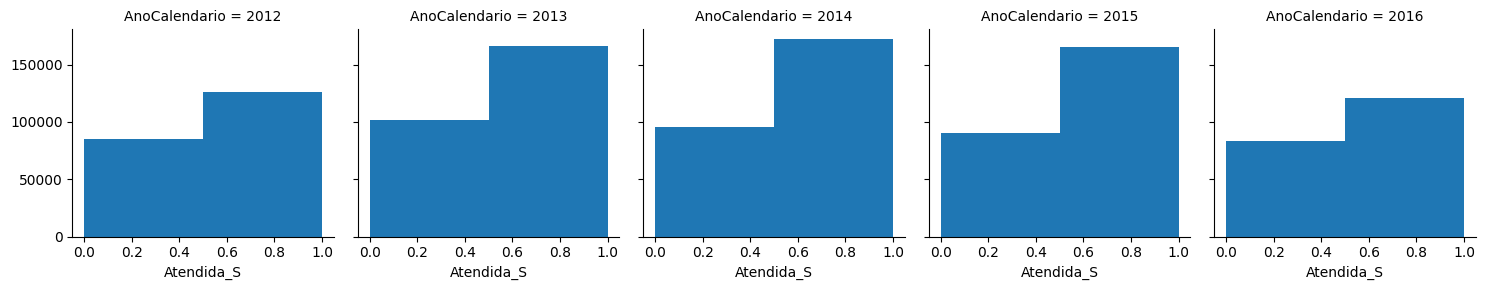

In [23]:
aten = sns.FacetGrid(df_analise1, col='AnoCalendario')
aten.map(plt.hist, 'Atendida_S', bins=2)

In [24]:
df_analise2 = df_analise1[['CodigoAssunto', 'AnoCalendario', 'Atendida_S', 'CodigoRegiao']]

In [25]:
df_analise2

,CodigoAssunto,AnoCalendario,Atendida_S,CodigoRegiao
0,54,2012,0,3
1,101,2012,0,3
2,129,2012,0,3
3,102,2012,1,5
4,118,2012,0,3
...,...,...,...,...
203481,187,2016,1,3
203482,185,2016,0,3
203483,264,2016,1,3
203484,53,2016,1,3


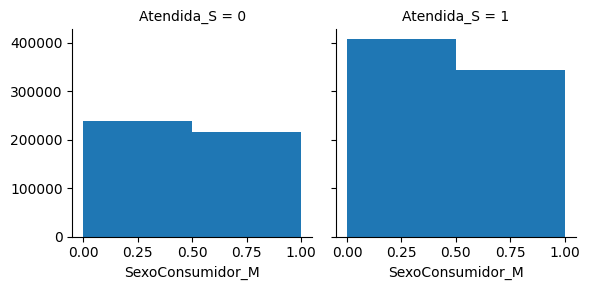

In [26]:
aten = sns.FacetGrid(df_analise1, col='Atendida_S')
aten.map(plt.hist, 'SexoConsumidor_M', bins=2)

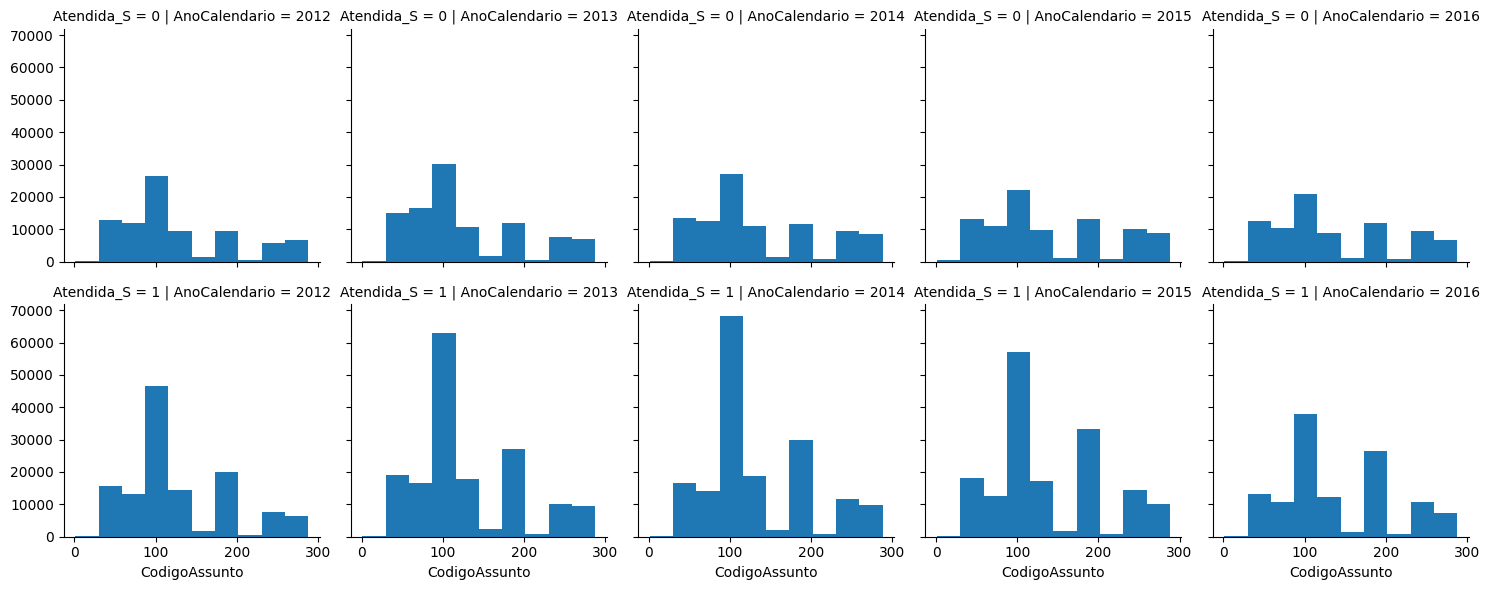

In [27]:
aten = sns.FacetGrid(df_analise2, col='AnoCalendario', row= 'Atendida_S')
aten.map(plt.hist, 'CodigoAssunto', bins=10)

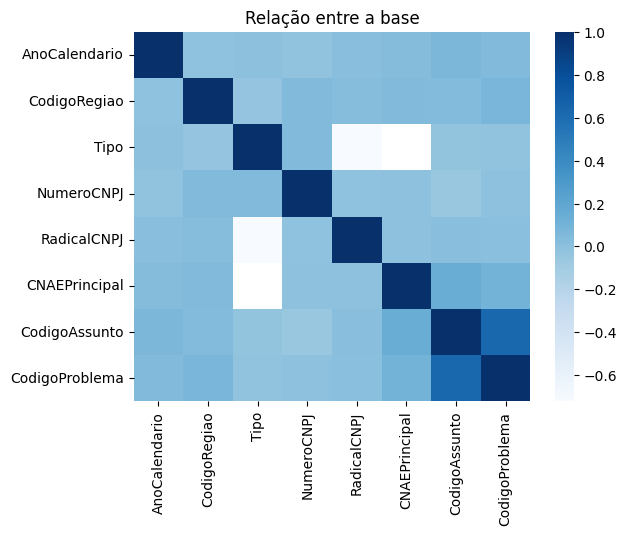

In [28]:
sns.heatmap(df_Main.corr(), 
            annot= False,
            fmt = '.2f', 
            cmap='Blues')
plt.title('Relação entre a base')
plt.show()

#### Analise de texto

In [29]:
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
nltk.download('punkt')
from collections import Counter 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /home/jean/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
df_world = pd.DataFrame(df_Main['DescCNAEPrincipal'].head(100).copy())

In [31]:
df_world.dropna(axis=0, inplace = True)

In [32]:
df_world.info

<bound method DataFrame.info of                                     DescCNAEPrincipal
0   ATIVIDADES DE INTERMEDIAÇÃO E AGENCIAMENTO DE ...
1   FABRICAÇÃO DE APARELHOS DE RECEPÇÃO, REPRODUÇÃ...
2    COMÉRCIO SOB CONSIGNAÇÃO DE VEÍCULOS AUTOMOTORES
3           FABRICAÇÃO DE EQUIPAMENTOS DE INFORMÁTICA
4   COMÉRCIO VAREJISTA DE MATERIAIS DE CONSTRUÇÃO ...
..                                                ...
95  FABRICAÇÃO DE APARELHOS DE RECEPÇÃO, REPRODUÇÃ...
96                       FILMAGEM DE FESTAS E EVENTOS
97  FABRICAÇÃO DE FOGÕES, REFRIGERADORES E MÁQUINA...
98  FABRICAÇÃO DE APARELHOS DE RECEPÇÃO, REPRODUÇÃ...
99         SERVIÇOS DE TELEFONIA FIXA COMUTADA - STFC

[97 rows x 1 columns]>

In [33]:
df_world['clean_text'] = df_world['DescCNAEPrincipal'].apply(lambda txt: re.sub('[^\w\s]', '', txt))
df_world['clean_text'] = df_world['clean_text'].apply(lambda txt: re.sub('(\\d|\\W)+', ' ', txt))

In [34]:
df_world['word_token'] = df_world['clean_text'].apply(word_tokenize)
df_world['sent_token'] = df_world['clean_text'].apply(sent_tokenize)

In [35]:
df_world

,DescCNAEPrincipal,clean_text,word_token,sent_token
0,ATIVIDADES DE INTERMEDIAÇÃO E AGENCIAMENTO DE ...,ATIVIDADES DE INTERMEDIAÇÃO E AGENCIAMENTO DE ...,"[ATIVIDADES, DE, INTERMEDIAÇÃO, E, AGENCIAMENT...",[ATIVIDADES DE INTERMEDIAÇÃO E AGENCIAMENTO DE...
1,"FABRICAÇÃO DE APARELHOS DE RECEPÇÃO, REPRODUÇÃ...",FABRICAÇÃO DE APARELHOS DE RECEPÇÃO REPRODUÇÃO...,"[FABRICAÇÃO, DE, APARELHOS, DE, RECEPÇÃO, REPR...",[FABRICAÇÃO DE APARELHOS DE RECEPÇÃO REPRODUÇÃ...
2,COMÉRCIO SOB CONSIGNAÇÃO DE VEÍCULOS AUTOMOTORES,COMÉRCIO SOB CONSIGNAÇÃO DE VEÍCULOS AUTOMOTORES,"[COMÉRCIO, SOB, CONSIGNAÇÃO, DE, VEÍCULOS, AUT...",[COMÉRCIO SOB CONSIGNAÇÃO DE VEÍCULOS AUTOMOTO...
3,FABRICAÇÃO DE EQUIPAMENTOS DE INFORMÁTICA,FABRICAÇÃO DE EQUIPAMENTOS DE INFORMÁTICA,"[FABRICAÇÃO, DE, EQUIPAMENTOS, DE, INFORMÁTICA]",[FABRICAÇÃO DE EQUIPAMENTOS DE INFORMÁTICA]
4,COMÉRCIO VAREJISTA DE MATERIAIS DE CONSTRUÇÃO ...,COMÉRCIO VAREJISTA DE MATERIAIS DE CONSTRUÇÃO ...,"[COMÉRCIO, VAREJISTA, DE, MATERIAIS, DE, CONST...",[COMÉRCIO VAREJISTA DE MATERIAIS DE CONSTRUÇÃO...
...,...,...,...,...
95,"FABRICAÇÃO DE APARELHOS DE RECEPÇÃO, REPRODUÇÃ...",FABRICAÇÃO DE APARELHOS DE RECEPÇÃO REPRODUÇÃO...,"[FABRICAÇÃO, DE, APARELHOS, DE, RECEPÇÃO, REPR...",[FABRICAÇÃO DE APARELHOS DE RECEPÇÃO REPRODUÇÃ...
96,FILMAGEM DE FESTAS E EVENTOS,FILMAGEM DE FESTAS E EVENTOS,"[FILMAGEM, DE, FESTAS, E, EVENTOS]",[FILMAGEM DE FESTAS E EVENTOS]
97,"FABRICAÇÃO DE FOGÕES, REFRIGERADORES E MÁQUINA...",FABRICAÇÃO DE FOGÕES REFRIGERADORES E MÁQUINAS...,"[FABRICAÇÃO, DE, FOGÕES, REFRIGERADORES, E, MÁ...",[FABRICAÇÃO DE FOGÕES REFRIGERADORES E MÁQUINA...
98,"FABRICAÇÃO DE APARELHOS DE RECEPÇÃO, REPRODUÇÃ...",FABRICAÇÃO DE APARELHOS DE RECEPÇÃO REPRODUÇÃO...,"[FABRICAÇÃO, DE, APARELHOS, DE, RECEPÇÃO, REPR...",[FABRICAÇÃO DE APARELHOS DE RECEPÇÃO REPRODUÇÃ...


In [36]:
sum(df_world['word_token'].apply(len).sort_values())

705

In [37]:
word_token_list = []

for i in df_world['word_token']:
    word_token_list += i


word_token_counter = Counter(word_token_list)

for key, value in word_token_counter.items():
    print(f'{key}: {value}')

ATIVIDADES: 3
DE: 124
INTERMEDIAÇÃO: 2
E: 62
AGENCIAMENTO: 2
SERVIÇOS: 8
NEGÓCIOS: 2
EM: 6
GERAL: 5
EXCETO: 2
IMOBILIÁRIOS: 2
FABRICAÇÃO: 26
APARELHOS: 13
RECEPÇÃO: 7
REPRODUÇÃO: 7
GRAVAÇÃO: 7
AMPLIFICAÇÃO: 7
ÁUDIO: 10
VÍDEO: 10
COMÉRCIO: 22
SOB: 1
CONSIGNAÇÃO: 1
VEÍCULOS: 1
AUTOMOTORES: 1
EQUIPAMENTOS: 24
INFORMÁTICA: 11
VAREJISTA: 13
MATERIAIS: 1
CONSTRUÇÃO: 1
NÃO: 5
ESPECIFICADOS: 4
ANTERIORMENTE: 5
AUXILIARES: 1
DOS: 2
SEGUROS: 3
DA: 2
PREVIDÊNCIA: 1
COMPLEMENTAR: 1
PLANOS: 3
SAÚDE: 3
ESPECIFICADAS: 1
ARTIGOS: 1
ESPORTIVOS: 1
MERCADORIAS: 2
COM: 11
PREDOMINÂNCIA: 3
PRODUTOS: 5
ALIMENTÍCIOS: 2
HIPERMERCADOS: 2
TELEFONIA: 21
MÓVEL: 11
CELULAR: 11
ARRENDAMENTO: 1
MERCANTIL: 1
ATACADISTA: 5
LIVROS: 2
JORNAIS: 1
OUTRAS: 1
PUBLICAÇÕES: 1
BANCOS: 10
MÚLTIPLOS: 9
CARTEIRA: 9
COMERCIAL: 9
TELEFÔNICOS: 5
OUTROS: 7
COMUNICAÇÃO: 9
PEÇAS: 7
ACESSÓRIOS: 7
PERIFÉRICOS: 4
PARA: 6
ESPECIALIZADO: 5
COMPONENTES: 3
ELETRÔNICOS: 4
FOGÕES: 2
REFRIGERADORES: 2
MÁQUINAS: 2
LAVAR: 2
SECAR: 2
USO: 5
DOMÉSTI

In [38]:
words_df = pd.DataFrame(columns='Palavra Frequencia Tamanho'.split())

In [39]:
words_df['Palavra'] = word_token_counter.keys()
words_df['Frequencia'] = word_token_counter.values()
words_df['Tamanho'] = words_df['Palavra'].apply(len)
words_df

,Palavra,Frequencia,Tamanho
0,ATIVIDADES,3,10
1,DE,124,2
2,INTERMEDIAÇÃO,2,13
3,E,62,1
4,AGENCIAMENTO,2,12
...,...,...,...
131,ELETROELETRÔNICOS,2,17
132,EDIÇÃO,1,6
133,FILMAGEM,1,8
134,FESTAS,1,6


<AxesSubplot:xlabel='Frequencia', ylabel='Tamanho'>

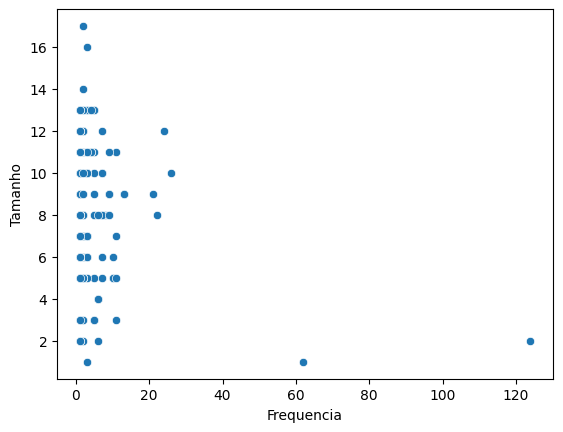

In [40]:
sns.scatterplot(data=words_df, x='Frequencia', y='Tamanho')

In [41]:
X = vectorizer.fit_transform(word_token_list)
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [42]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

In [43]:
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names()).head(10)

/home/jean/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,acessórios,administração,agenciamento,alimentícios,aluguel,amplificação,anteriormente,aparelhos,arrendamento,artigos,atacadista,atividades,automotores,automóveis,auxiliares,avaliação,bancos,calçados,camionetas,carteira,cartões,celular,com,comerciais,comercial,complementar,componentes,compra,comunicação,comutada,comércio,consignação,construção,corretagem,crédito,da,de,departamentos,distribuição,diversos,doméstico,dos,edição,eletrodomésticos,eletroeletrônicos,eletrônicos,elétrica,em,energia,equipamentos,especializado,especificadas,especificados,esportivos,eventos,exceto,fabricação,festas,filmagem,financeiras,financiamento,fixa,flores,fogões,geral,gestão,gravação,hipermercados,imobiliária,imobiliários,imóveis,informática,intermediação,investimento,jornais,lavar,livros,lojas,madeira,magazines,manutenção,materiais,mercadorias,mercantil,máquinas,móveis,móvel,múltiplos,na,naturais,negócios,novos,não,nãovida,ou,outras,outros,para,periféricos,pessoal,peças,planos,plantas,predominância,previdência,produtos,propriedade,próprios,publicações,pública,recepção,refrigeradores,reparação,reprodução,saúde,secar,seguros,sem,serviços,sob,sociedades,stfc,telefonia,telefônicos,treinamento,usados,uso,utilitários,varejista,varejo,venda,veículos,vídeo,áudio
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
tfidf = TfidfVectorizer()

tfidf_matrix = tfidf.fit_transform(word_token_list)
pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names())

/home/jean/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,acessórios,administração,agenciamento,alimentícios,aluguel,amplificação,anteriormente,aparelhos,arrendamento,artigos,atacadista,atividades,automotores,automóveis,auxiliares,avaliação,bancos,calçados,camionetas,carteira,cartões,celular,com,comerciais,comercial,complementar,componentes,compra,comunicação,comutada,comércio,consignação,construção,corretagem,crédito,da,de,departamentos,distribuição,diversos,doméstico,dos,edição,eletrodomésticos,eletroeletrônicos,eletrônicos,elétrica,em,energia,equipamentos,especializado,especificadas,especificados,esportivos,eventos,exceto,fabricação,festas,filmagem,financeiras,financiamento,fixa,flores,fogões,geral,gestão,gravação,hipermercados,imobiliária,imobiliários,imóveis,informática,intermediação,investimento,jornais,lavar,livros,lojas,madeira,magazines,manutenção,materiais,mercadorias,mercantil,máquinas,móveis,móvel,múltiplos,na,naturais,negócios,novos,não,nãovida,ou,outras,outros,para,periféricos,pessoal,peças,planos,plantas,predominância,previdência,produtos,propriedade,próprios,publicações,pública,recepção,refrigeradores,reparação,reprodução,saúde,secar,seguros,sem,serviços,sob,sociedades,stfc,telefonia,telefônicos,treinamento,usados,uso,utilitários,varejista,varejo,venda,veículos,vídeo,áudio
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,.